<a href="https://colab.research.google.com/github/dahlia52/ESAA_2022-2/blob/main/PART3_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 1 ~ 4 P.50 ~ 95

# PART 3 케라스(Keras)

## 01 딥러닝 준비

- 텐서플로1에서 텐서플로 2로 정식 판올림을 하면서 생긴 가장 큰 변화는 케라스 API를 텐서플로가 내제화했다는 것

- 케라스 API는 다른 딥러닝 라이브러리와 같이 GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용함.

- 하이퍼파라미터: 사용자가 직접 설정해주는 설정 값

  Tip) 모델의 예측 성능을 높이기 위해 하이퍼파라미터 튜닝에 많은 시간이 투자되는 것이 일반적임. 하지만, 딥러닝 프로젝트를 실행하는 초기 단계에 많은 시간을 튜닝하는데 투자하는 것보다 가장 마지막 단계에서 진행하는 것을 추천함.

- 과소적합 vs. 과대적합

  훈련 데이터는 예측 데이터와 분포(편향된 데이터X)가 동일하게 구성해야 하며 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 함.  훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정

- 에포크: 딥러닝 모델을 반복 훈련할 때, 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

  Tip) 사전에 설정한 최대 epoch까지 반복 학습이 끝나더라도 모델이 과소적합되었다고 판단된다면 epoch를 늘려서 다시 학습시켜야 함.

- 손실함수

  Tip) 딥러닝 문제에 따라서는 텐서플로에서 제공되는 손실함수로 해결하기 어려운 경우가 있음. 이럴 때는 사용자가 직접 손실함수를 만들어 사용해야 함. 함수 형태나 클래스 형태 모두 가능




In [ ]:
# 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용
import tensorflow as tf
# 클래스
tf.keras.losses.BinaryCrossentropy()
# 함수
tf.keras.losses.binary_crossentropy()

- 경사하강법

가설 함수: y^ = wx + b

손실함수 1/2 * Σ(y - y^)^2

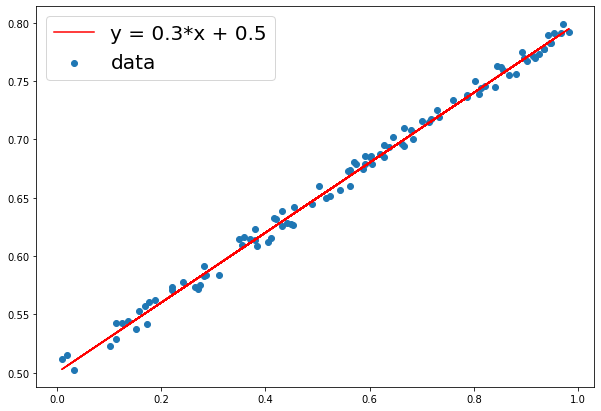

w:0.3, b:0.5


In [3]:
# 경사하강법
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w*x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r', label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [12]:
# 최대 반복 횟수
num_epoch = 1000
# 학습률
learning_rate = 0.005
# 에러 기록
errors = []
# random한 값으로 w,b 초기화
w = np.random.uniform(low=0, high=1)
b = np.random.uniform(low=0, high=1)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w*x+b
  # Loss Function 정의
  error = 0.5*((y_hat - y)**2).sum()
  if error <0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y)*x).sum()
  b = b - learning_rate * ((y_hat - y)).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b={2:.5f}, error={3:.5f}".format(epoch, w, b, error))
  
print("-------"*15)
print("{0:2} w = {1:.1f}, b = {2:.1f}, error={3:.5f}".format(epoch, w,b,error))

 0 w = 0.60001, b=0.31877, error=0.38717
 5 w = 0.56327, b=0.34740, error=0.27563
10 w = 0.52865, b=0.36762, error=0.20843
15 w = 0.49856, b=0.38516, error=0.15773
20 w = 0.47242, b=0.40039, error=0.11947
25 w = 0.44971, b=0.41363, error=0.09060
30 w = 0.42999, b=0.42513, error=0.06882
35 w = 0.41286, b=0.43511, error=0.05238
40 w = 0.39797, b=0.44379, error=0.03998
45 w = 0.38504, b=0.45132, error=0.03062
50 w = 0.37382, b=0.45787, error=0.02356
55 w = 0.36406, b=0.46355, error=0.01823
60 w = 0.35559, b=0.46849, error=0.01421
65 w = 0.34823, b=0.47278, error=0.01117
70 w = 0.34183, b=0.47651, error=0.00889
75 w = 0.33628, b=0.47975, error=0.00716
80 w = 0.33145, b=0.48256, error=0.00585
---------------------------------------------------------------------------------------------------------
85 w = 0.3, b = 0.5, error=0.00487


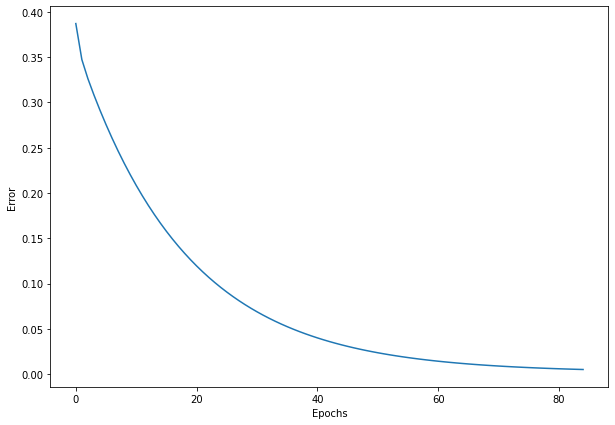

In [13]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### 딥러닝 프로세스

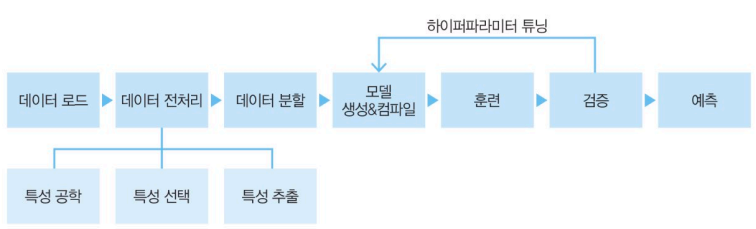

- **데이터 전처리**: 배열의 차원 변경, 스케일 조정 등

- **모델 생성**: 모델의 구조를 정의하고 생성하는 단계

  순차적인 구조(Sequential API), 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델(Functional API, Model Subclassing)

- **모델 컴파일**: 생성된 모델 훈련에 사용할 손실함수, optimizer, 평가지표(metrics) 등을 정의함. 모델 인스턴스에 compile() 메소드를 적용하고 앞에서 열거한 여러 가지 속성 값을 설정함.

- **모델 훈련**: fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달함. ex. 훈련 데이터셋, 검증 데이터셋, epoch, batch size, callback 함수

- **모델 검증**: 훈련이 완료된 모델을 검증하는 단계

- **모델 예측**: 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 결과 반환



## 02 단순 신경망 구현

### [2-1] **선형 회귀**

- 회귀분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

- 선형 회귀: y = wx + b

### [2-2] **뉴런 (노드)**



- 인공 신경망 모델을 구성하는 하나의 신경

- 신경망은 여러 개의 layer를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨. 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨.

  Tip) 역전파(back propagation) 알고리즘: 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법. 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장함.

### [2-3] **Dense Layer**



- 심층 신경망 모델을 구성하는 가장 기본 레이어

- 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층(Fully Connected Layer)라고 부름.




4개의 Dense Layer로 구성된 모델

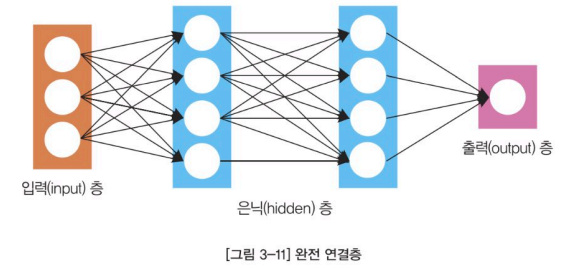

In [15]:
# Dense layer를 구성하는 노드 개수와 활성화 함수 지정
import tensorflow as tf
# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)
# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### [2-4] 데이터셋 만들기

In [17]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


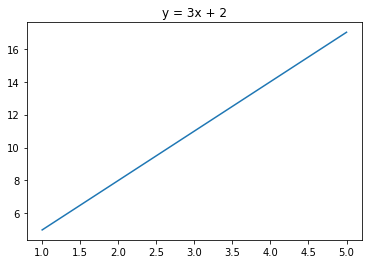

In [18]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title("y = 3x + 2")
plt.show()

### [2-5] **Sequential API**

- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식

- 입력 레이어부터 출력 레이어까지 순서를 가짐.

- 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산 수행

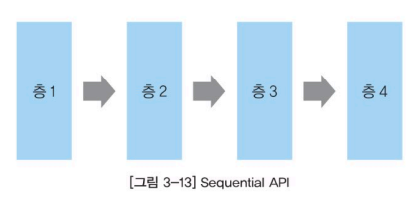

- 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점 존재 -> Functional API 이용


### [2-5-1] 모델 구조

두 가지 방법으로 모델 구성 가능

- Sequential 클래스 함수에 리스트 형태로 여러 개의 층을 입력하는 방법

- add 함수로 Sequential 클래스 객체를 먼저 만든 뒤 생성된 모델 인스턴스에 층을 추가하는 방법

In [19]:
# Dense layer 3개를 갖는 모델 생성
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### [2-5-2] 입력 데이터 형태

Sequential API를 이용하여 모델을 구성 시, 반드시 첫번째 층은 input_shape 매개변수를 튜플 혹은 리스트로 지정해야 함. 

In [20]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

### [2-5-3] 단순선형회귀 모델 정의

In [21]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # 입력변수는 X 1개만 존재
])

- Dense layers는 use_bias = True가 default로 상수항 b가 추가됨.

### [2-6] 모델 요약: **model.summary()**

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params: 모델 내부에 존재하는 모든 파라미터의 합계

- Trainable parmas: 모델 훈련 시 업데이트할 파라미터의 총 개수    ex. w, b

- Non-trainable params: 훈련 시 업데이트하지 않을 파라미터의 총 개수

### [2-7] 컴파일



- 모델의 훈련 과정에서 적용할 **optimizer, loss, metrics** 등을 정의함.

- 3가지 방법으로 지정 가능: 클래스 인스턴스, 함수, 사전 정의된 문자열

- 클래스 인스턴스로 지정할 경우 learning rate, momentum 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있음.

- 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터를 사용하고 하이퍼파라미터 수정은 어려움.

  Tip) 일반적으로 많이 사용되는 검증된 기본값을 하이퍼파라미터로 적용하기 때문에 기본 설정만으로도 딥러닝 모델의 성능은 잘 나오는 편임.  

In [23]:
# optimizer: sgd(Stochastic Gradient Descent)
# loss: mean_squared_error(평균제곱오차)
# metrics(평가지표): mse, mae(평균절대오차)

# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()
                         ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### [2-8] 훈련

- 모델 훈련: 가중치 텐서를 업데이트하는 과정

- fit()메소드에 훈련용 데이터셋의 입력(x), 출력(y), 반복 훈련 epoch 수 지정

- verbose=0: 훈련 중간 과정 출력X

In [24]:
model.fit(x,y,epochs=5) # 모델의 오차가 점점 줄어듦. 과소적합 상태

Epoch 1/5
1/1 [==============================] - 1s 747ms/step - loss: 8.6842 - mean_absolute_error: 8.6842 - mean_squared_error: 85.3430
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 8.6342 - mean_absolute_error: 8.6342 - mean_squared_error: 84.3438
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 8.5842 - mean_absolute_error: 8.5842 - mean_squared_error: 83.3506
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 8.5342 - mean_absolute_error: 8.5342 - mean_squared_error: 82.3633
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 8.4842 - mean_absolute_error: 8.4842 - mean_squared_error: 81.3818


In [25]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# 훈련
history = model.fit(x,y,epochs=1200)
# history: epoch 별 훈련 손실과 평가지표가 딕셔너리 형태로 저장됨.

Epoch 1/1200
1/1 [==============================] - 0s 365ms/step - loss: 121.4945 - mae: 10.3039
Epoch 2/1200
1/1 [==============================] - 0s 10ms/step - loss: 70.8990 - mae: 7.9110
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 41.4138 - mae: 6.0841
Epoch 4/1200
1/1 [==============================] - 0s 9ms/step - loss: 24.2306 - mae: 4.6894
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 14.2165 - mae: 3.6245
Epoch 6/1200
1/1 [==============================] - 0s 12ms/step - loss: 8.3801 - mae: 2.8114
Epoch 7/1200
1/1 [==============================] - 0s 8ms/step - loss: 4.9783 - mae: 2.1906
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 2.9952 - mae: 1.7165
Epoch 9/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.8390 - mae: 1.3544
Epoch 10/1200
1/1 [==============================] - 0s 9ms/step - loss: 1.1645 - mae: 1.0779
Epoch 11/1200
1/1 [==============================] - 0s 1

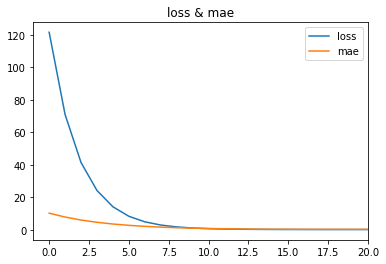

In [28]:
import matplotlib.pyplot as plt
# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title("loss & mae")
plt.legend()
plt.show()

### [2-9] 검증: **evaluate()**

- 사전에 별도의 검증 데이터셋을 준비하여 모델의 성능을 평가하는 것이 일반적임. 별도의 데이터셋을 검증용으로 활용하는 방법을 교차 검증(cross-validation)이라 부름. ex. 홀드아웃, K-Fold 교차 검증

In [31]:
model.evaluate(x,y) # 모델의 훈련 단계에서 1200번 epoch를 종료한 상태에서의 출력값과 동일

1/1 [==============================] - 0s 246ms/step - loss: 7.0483e-05 - mae: 0.0072


[7.048256520647556e-05, 0.007205867674201727]

### [2-10] 예측: **predict()**

In [32]:
model.predict([10]) # y = 3*10+2 = 32

1/1 [==============================] - 0s 301ms/step


array([[32.034824]], dtype=float32)

## 03 심층 신경망으로 이미지 분류

### [3-1] 케라스 내장 데이터셋 로드

In [34]:
import tensorflow as tf
# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("train set: ", x_train.shape, y_train.shape) # 28x28 픽셀 크기의 정사각형 이미지가 60000장
print("test set: ", x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


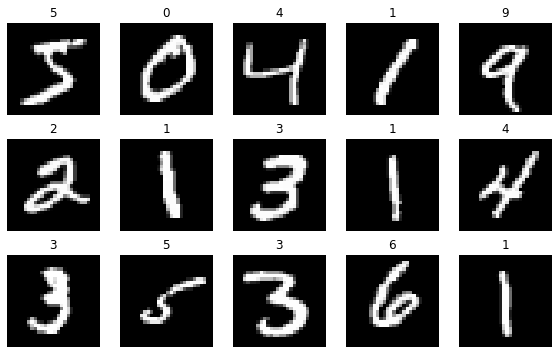

In [35]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### [3-2] 데이터 전처리

In [36]:
# x_train 배열의 데이터 확인: 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [37]:
# 픽셀 값의 최소/최대값 확인
print(f"정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}") # 0~255

# 데이터 정규화
x_train = x_train/x_train.max() 

# 정규화 후 최소/최대값 확인
print(f"정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}") # 0~1

# test set에도 정규화 동일 적용
x_test = x_test / x_test.max()

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [38]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

Tip) 정규화를 하는 이유: 입력 데이터가 정규화되어 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하기 때문. 국소 최적(local optimum)에 빠지는 현상을 방지해주는 효과도 있음.

### [3-3] Flatten 레이어

- 샘플 이미지의 형태는 (28,28)로 이루어져 있고, 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없으므로 이미지 데이터를 1차원으로 전처리해야 함.

In [39]:
print(f"변경 전 shape: {x_train.shape}")
print(f"1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}")

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [40]:
# 위 방법 대신 Flatten layer를 통해 다차원 데이터를 1차원으로 펼쳐줄 수도 있음.
print(f"변경 전 shape: {x_train.shape}")
print(f"Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}")

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### [3-4] 활성화 함수 (Activation Function)

- 입력을 비선형 출력으로 변환해주는 함수

- 일반적으로 선형관계를 나타내는 함수에 비선형을 추가하는 방법으로 표현되기도 함.

- 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 선형함수로 표현됨.

ex. Sigmoid, Hyperbolic Tangent (tanh), ReLU(Rectified Unit), Leaky ReLu

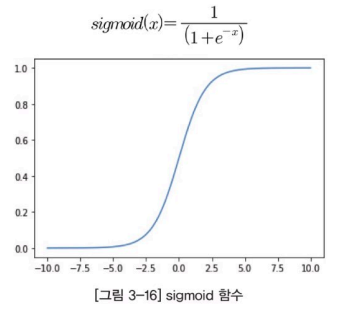

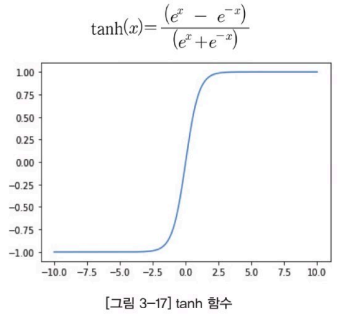

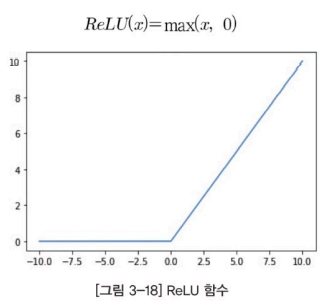

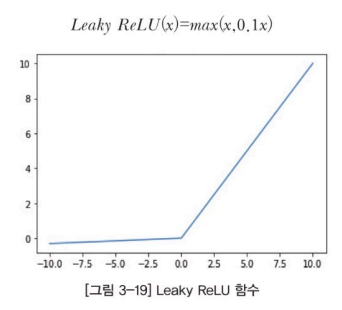

In [41]:
# Dense layer에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [43]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우 
# 일반적으로 Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 사용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### [3-5] 입력과 출력

- 출력층의 노드 수 = 분류해야 할 클래스 수

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10 (0~9)
    tf.keras.layers.Dense(10, activation='softmax')
])

이 예제에서는 Flatten 층으로 펼친 784개의 변수에 대한 입력값을 노드 개수를 조금씩 줄여가며 최종 출력 클래스 개수인 10개까지 정보를 축약함.모델의 깊이(Layer 수)와 너비(각 Layer를 구성하는 노드 수)에 대한 정답은 없음. 최적의 모델을 찾기 위해서는 여러 가지 시도를 통해서 최적의 모델 형태를 찾을 필요가 있음. Layer 수와 노드 수가 중요한 하이퍼 파라미터

- 출력층의 노드 수가 2개 이상일 때(다중 분류 문제): **softmax**

- 출력층의 노드 수가 1개일 때(이진 분류 모델): **sigmoid**

- 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수를 사용함.

In [45]:
# 출력층 노드 = 1 인 경우: sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')
# 출력층 노드 = 2개 이상인 경우: softmax
tf.keras.layers.Dense(10, activation="softmax")

### [3-6] 손실함수

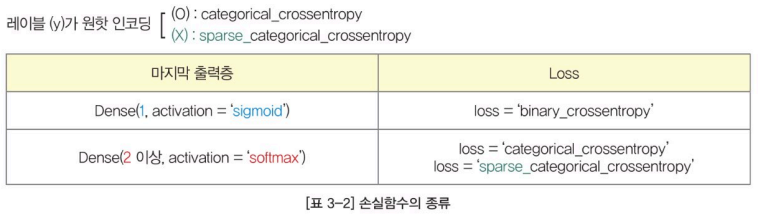

In [46]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss="binary_crossentropy")

# y가 원핫 벡터인 경우 ex. [0.. 0.. 1.. 0..]
model.compile(loss="categorical_crossentropy")
# y가 원핫 벡터가 아닌 경우 ex. [5]
model.compile(loss="sparse_categorical_crossentropy")

### [3-7] 옵티마이저

- 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법

- 일반적으로는 Adam이 좋은 성능을 냄.

- optimizer는 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있음. 

- 문자열로 지정할 때는 클래스 이름을 소문자로 표기하면 됨. 

- 클래스 인스턴스로 지정할 때는 학습률과 같은 하이퍼파라미터를 직접 설정할 수 있음.

In [47]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### [3-8] 평가지표

- accuracy가 가장 많이 사용되며 auc, precision, recall 등의 지표도 많이 사용됨.

- 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있음.

In [48]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# 문자열로 지정
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### [3-9] 훈련

- 검증 셋 지정: validation_data = (x_test,y_test)

In [49]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2203 - accuracy: 0.9343 - val_loss: 0.1045 - val_accuracy: 0.9682
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0917 - accuracy: 0.9714 - val_loss: 0.0845 - val_accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0638 - accuracy: 0.9798 - val_loss: 0.0757 - val_accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0902 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.0813 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0881 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0959 - val_accura

### [3-10] 평가

In [51]:
# 검증셋 평가
test_loss, test_auc = model.evaluate(x_test, y_test)
print("검증 셋 정확도: ", test_auc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9806
검증 셋 정확도:  0.9805999994277954


### [3-11] 예측

In [52]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [53]:
# 예측 결과
predictions[0] # 출력층의 노드 수가 10개이므로 10개의 값이 출력됨.

array([9.7605542e-18, 1.4799917e-11, 2.7218711e-08, 1.0670753e-09,
       2.2177013e-10, 1.7793474e-14, 2.5340489e-20, 9.9999994e-01,
       1.1056696e-10, 2.2650029e-10], dtype=float32)

- softamx 활성화 함수를 거진 출력값은 순차적으로 0~9까지의 10개의 개별 클래스에 대한 분류 확률값을 나타냄. 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스임.

In [55]:
import numpy as np
# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))
# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


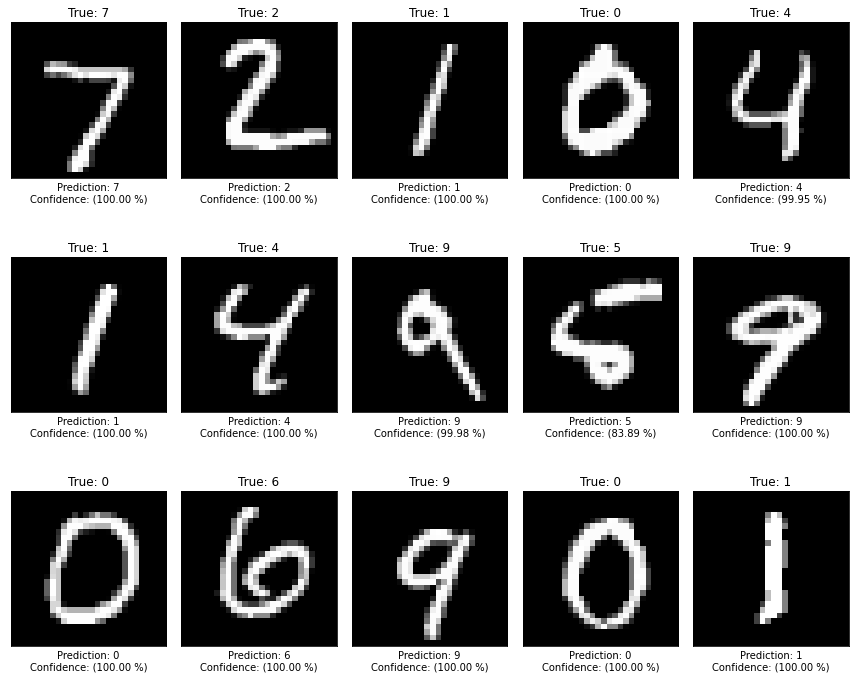

In [57]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)

  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"True: {y_true}")
  ax.set_xlabel(f"Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)")
plt.tight_layout()
plt.show()

## 04 모델 세부 설정

In [59]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


### [4-1] 초기값 설정 

- Dense layer의 기본 초기화 방법으로 GlorotUniform 초기화 방법이 설정되어 있음.

- 기본값으로 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하려면 kernel_initializer 매개변수에 설정하면 됨.

In [60]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [61]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer="he_normal", activation="relu")
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation="relu")
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


### [4-2] 규제(Regularization)

- 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않음. (kernel_regularizer=None)

In [62]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_25',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [64]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용. alpha = 0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### [4-3] 드롭아웃(Dropout)

- 모델의 과대적합 문제를 해결하기 위함. 

- wide-and-deep 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있음.

- 노드의 일부 신호를 임의로 삭제하여 모델이 학습하는 가중치 파라미터의 개수를 줄여 모델이 쉽게 과대적합되는 것을 방지함.

- 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용됨.

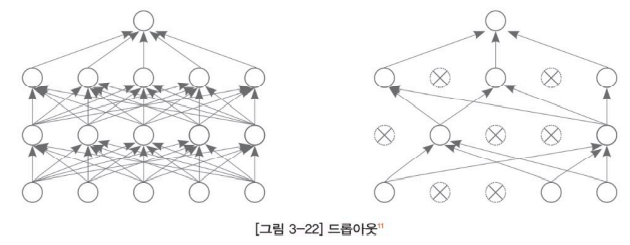

In [65]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### [4-4] 배치 정규화 (Batch Normalization)

- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함. 

- 손실이 더 안정적이고 빠르게 수렴함.

In [67]:
# model A: Dense + ReLU
model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_A.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                50240     
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [74]:
# model_B: Dense + BatchNorm + ReLU
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_B.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                      

### [4-5] 활성화 (activation) 함수

In [77]:
# LeaklyReLU 기본 설정
tf.keras.layers.LeakyReLU()
# LeaklyReLU alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [79]:
# model_C: Dense + BatchNorm + LeakyReLu(0.2)
model_C = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_C.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                     

In [80]:
model_A.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_B.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_C.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model_A: Dense + ReLU
history_A = model_A.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# model_B: Dense + BatchNorm + ReLU
history_B = model_B.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# model_C: Dense + BatchNorm + LeakyReLU(0.2)
history_C = model_C.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2948 - accuracy: 0.9164 - val_loss: 0.1786 - val_accuracy: 0.9461
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1340 - accuracy: 0.9607 - val_loss: 0.1235 - val_accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0991 - accuracy: 0.9705 - val_loss: 0.1040 - val_accuracy: 0.9662
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.1011 - val_accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.0869 - val_accuracy: 0.9723
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0970 - val_accuracy: 0.9716
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0890 - val_accurac

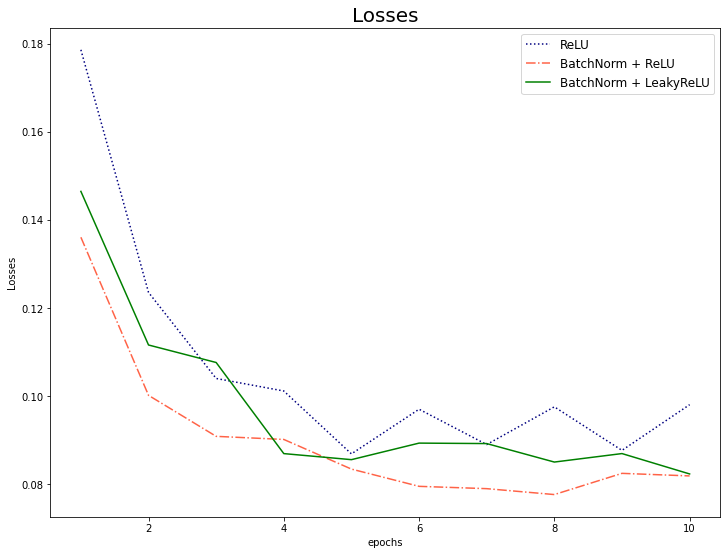

In [82]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_A.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_B.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_C.history['val_loss'], color='green', linestyle='-')

plt.title("Losses", fontsize=20)
plt.xlabel("epochs")
plt.ylabel("Losses")
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize=12)
plt.show()